In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
#图片读取用cv2.imread
img_ori = cv2.imread('lenna.jpg',1)
img_ori.shape

(500, 500, 3)

In [4]:
#cv2.imshow可以打印图片
# Key = 27: 按下Esc键退出图片
cv2.imshow('lenna',img_ori)
key = cv2.waitKey(0)
if key ==27:
    cv2.destroyAllWindows()

#plt也可以打印图片，但注意是否为灰度图，以及通道顺序
plt.figure('figuresize = (1,1)')
plt.imshow(img_ori,cmap = 'gray')
plt.show()

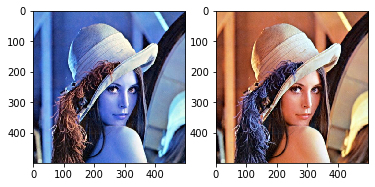

In [5]:
# subplt子图的使用
plt.subplot(121)
plt.imshow(img_ori)
plt.subplot(122)
plt.imshow(cv2.cvtColor(img_ori, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
def my_show(img,size = (3,3)):
    plt.figure(figsize = size)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.show()

# imge crop

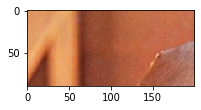

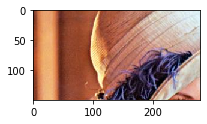

In [7]:
b = my_show(img_ori[10:100,0:200])
a = my_show(img_ori[100:250,20:300])

# channel split

In [8]:
##图像通道的分别处理

In [9]:
B,G,R = cv2.split(img_ori)

In [10]:
cv2.imshow('B',B)
cv2.imshow('G',G)
cv2.imshow('R',R)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

# Gmmma Change

In [11]:
#Look Up Table效率很高
def adjust_gamma(img, gamma = 1.0):
    invGamma = 1.0/gamma
    table = []
    for i in range(256):
        table.append(((i/255.0)**invGamma)*255)
    table = np.array(table).astype('uint8')
    return cv2.LUT(img, table)

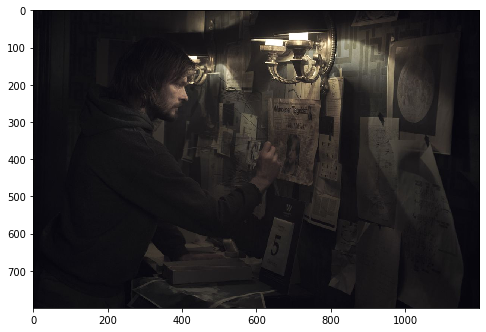

In [12]:
img_dark = cv2.imread('dark.jpg',1)
my_show(img_dark,size = (8,8))

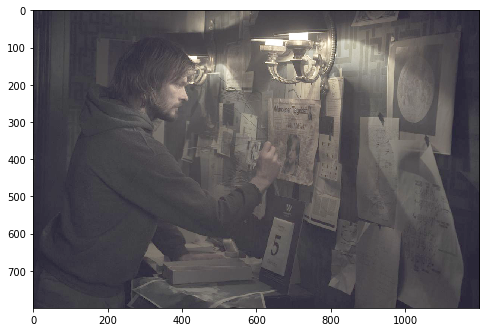

In [13]:
img_brighter = adjust_gamma(img_dark,2)
my_show(img_brighter,size  = (8,8))

# 直方图均衡

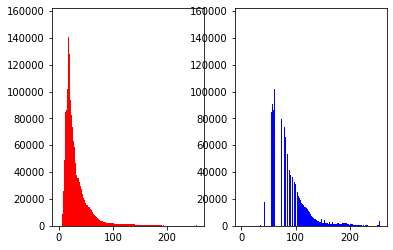

In [14]:
plt.subplot(121)
plt.hist(img_dark.flatten(),256,[0,256],color = 'r')
plt.subplot(122)
plt.hist(img_brighter.flatten(),256,[0,256],color = 'b')
plt.show()


# trasform

In [15]:
#perspective tranform

In [16]:
pts1 = np.float32([[0,0],[0,500],[500,0],[500,500]])
pts2 = np.float32([[5,19],[19,460],[460,9],[410,420]])
# pts1 = np.float32([[0,0],[0,500],[500,0],[500,500]])  # 源点创建
# pts2 = np.float32([[5,19],[19,460],[460,9],[410,420]])  # 目标点创建
M = cv2.getPerspectiveTransform(pts1,pts2)  # 计算得到单应性矩阵
img_warp = cv2.warpPerspective(img_ori,M,(500,500))


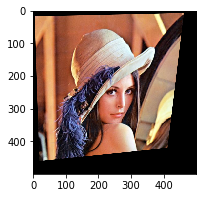

In [17]:
my_show(img_warp)

In [24]:
#rotation
img =  img_ori
M = cv2.getRotationMatrix2D((img.shape[1] / 2,img.shape[0] / 2), 30, 1)
img_rotate = cv2.warpAffine(img,M,(img.shape[1],img.shape[0]))
cv2.imshow('rotated lenna',img_rotate)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

print(M)

#set M[1][2] = M[1][2] = 0
print(M)
img_rotate2 = cv2.warpAffine(img,M,(img.shape[1],img.shape[0]))
cv2.imshow('ratated lenna',img_rotate2)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()
#explain traslation

#scale+ration+translation = similarity trahsform

M = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), 30, 0.5)# cemcer, angle. scale
img_ratate = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('rotate',img_rotate)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()
print(M)

#########################

#Affine Transfprm
rows,cols, ch = img.shape
pts1 = np.float32([[0,0],[cols - 1,0],[0,rows - 1]])
pts2 = np.float32([[cols * 0.2,rows * 0.1],[cols * 0.9,rows * 0.2],[cols * 0.1,rows * 0.9]])

M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img, M, (cols, rows))

cv2.imshow('affine lenna',dst)
if key == 27:
    cv2.destroyAllWindows()
    
########################

# perspective transform
def random_warp(img, row, col):
    height, width, channels = img.shape
    
    # warp
    random_margin = 60
    x1 = random.randint(-random_margin,random_margin)
    y1 = random.randint(-random_margin, random_margin)
    x2 = random.randint(width - random_margin - 1, width - 1)
    y2 = random.randint(-random_margin, random_margin)
    x3 = random.randint(width - random_margin - 1, width - 1)
    y3 = random.randint(height - random_margin - 1, height - 1)
    x4 = random.randint(-random_margin, random_margin)
    y4 = random.randint(height - random_margin - 1, height - 1)

    dx1 = random.randint(-random_margin, random_margin)
    dy1 = random.randint(-random_margin, random_margin)
    dx2 = random.randint(width - random_margin - 1, width - 1)
    dy2 = random.randint(-random_margin, random_margin)
    dx3 = random.randint(width - random_margin - 1, width - 1)
    dy3 = random.randint(height - random_margin - 1, height - 1)
    dx4 = random.randint(-random_margin, random_margin)
    dy4 = random.randint(height - random_margin - 1, height - 1)
    
    pts1 = np.float32([[x1, y1], [x2,y3],[x3,y3],[x4,y4]])
    pts2 = np.float32([[dx1, dy1],[dx2,dy2],[dx3,dy3],[dx4,dy4]])
    M_warp = cv2.getPerspectiveTransform(pts1, pts2)
    img_warp = cv2.warpPerspective(img, M_warp, (width, height))  
    return M_warp, img_warp
  
M_warp, img_warp = random_warp(img, img.shape[0], img.shape[1])
cv2.imshow('lenna_warp', img_warp)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

[[  0.8660254    0.5        -91.50635095]
 [ -0.5          0.8660254  158.49364905]]
[[  0.8660254    0.5        -91.50635095]
 [ -0.5          0.8660254  158.49364905]]
[[  0.4330127    0.25        79.24682453]
 [ -0.25         0.4330127  204.24682453]]


# 膨胀和腐蚀

In [19]:
img_writting = cv2.imread('libai.png',0)

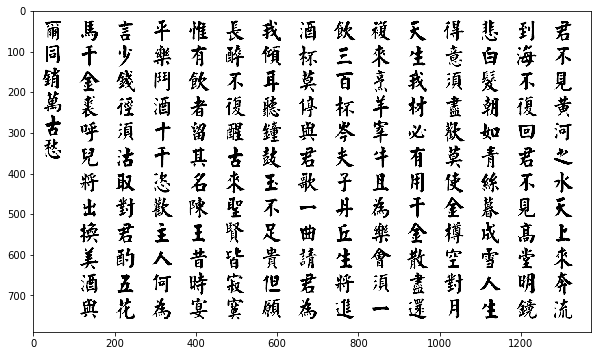

In [20]:
plt.figure(figsize = (10,8))
plt.imshow(img_writting, cmap = 'gray')
plt.show()

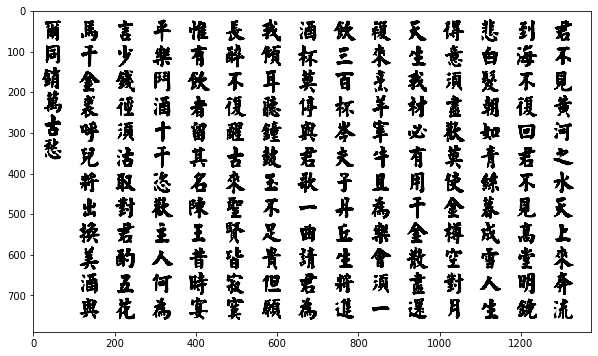

In [21]:
erode_writting = cv2.erode(img_writting, None, iterations = 1)
plt.figure(figsize = (10,8))
plt.imshow(erode_writting, cmap = 'gray')
plt.show()

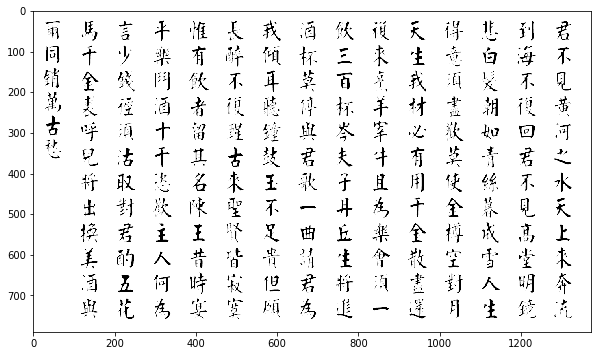

In [22]:
dilate_writting = cv2.dilate(img_writting, None, iterations = 1)
plt.figure(figsize = (10,8))
plt.imshow(dilate_writting,cmap = 'gray')
plt.show()

2. Please answer some questions about our course. We do appreciate your help.
2.1 What do you want to get in this course?

Answer:能达到应聘算法工程师的要求

2.2 What problems do you want to solve?

Answer:能复现论文

2.3 What advantages do you have to accomplish your goal?

Answer:数学思维

2.4 What disadvantages you need to overcome to accomplish your goal?

Answer:代码能力比较差

2.5 How will you plan to study in this course?

Answer跟着老师走，多多打代码做项目

